In [33]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [11]:
# Check for null values
pokemon.isnull().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

In [26]:
# We will use the pandas.DataFrame.melt() method to 
# unpivot a DataFrame from wide to long format, 
# optionally leaving identifiers set.

pkmn_types = pokemon.melt(
    id_vars=['id', 'species'],
    value_vars=['type_1', 'type_2'],
    var_name='type_level',
    value_name='type'
).dropna()

pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [23]:
type_counts = pkmn_types['type'].value_counts()

type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [24]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='type'>

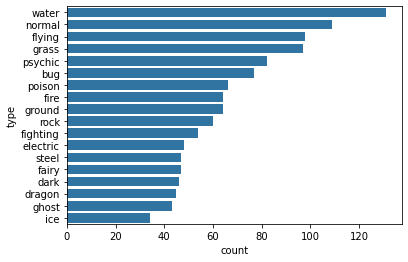

In [25]:
base_color = sb.color_palette()[0]

# Absolute Count
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order)

In [41]:
# Relative Count

n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]

# Get the highest proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [40]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ["{:0.2f}".format(v) for v in tick_props]

tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

Text(0.5, 0, 'proportion')

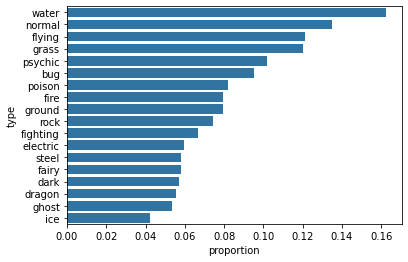

In [47]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
plt.xticks(tick_props * n_pokemon, tick_names);
plt.xlabel('proportion')

type_counts:  water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64


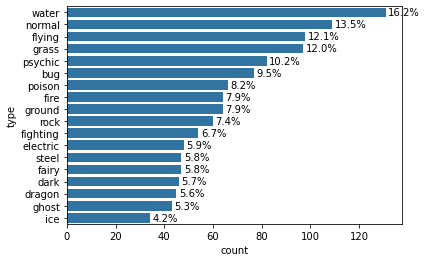

In [64]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
print('type_counts: ', type_counts)
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = "{:0.1f}%".format(100 * count / n_pokemon)
    plt.text(count + 1, i, pct_string, va='center')

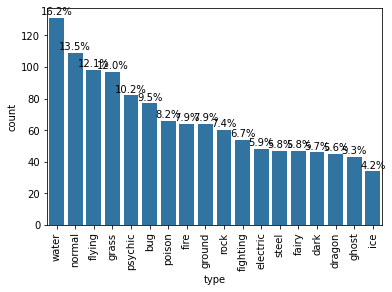

In [66]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

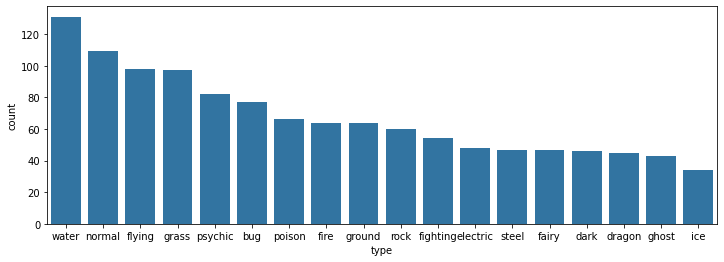

In [68]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);